## ARIMA 모델을 이용한 유튜버 성장률 예측

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 유튜버 정보 csv에서 읽어오기

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/뷔브독_stat.csv',index_col = 'searchDate')

In [ ]:
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-02-14,6976,54500,225,0,38
2020-02-15,6042,54500,226,0,36
2020-02-16,9796,54500,227,0,43
2020-02-17,10037,54500,227,0,43
2020-02-18,6946,54400,227,0,38
...,...,...,...,...,...
2021-02-12,5813,69100,305,98,22
2021-02-13,5503,69100,305,98,21
2021-02-14,6724,69100,306,98,22


## 컬럼 정리 (구독자 수만 남겨놓기)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
df

,subscriberCount
searchDate,
2020-02-14,54500
2020-02-15,54500
2020-02-16,54500
2020-02-17,54500
2020-02-18,54400
...,...
2021-02-12,69100
2021-02-13,69100
2021-02-14,69100


## 30일 예측하기 위해서 마지막 한달 데이터 test로 분리

In [ ]:
df_size = len(df)
pred_date = 30 # 30일 예측
target_date = df_size - pred_date

In [ ]:
train_df = df[:target_date]

In [ ]:
test_df = df[target_date:]

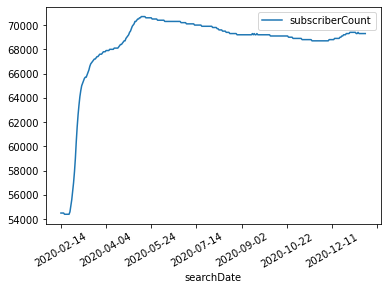

In [ ]:
train_df.plot()
plt.xticks(rotation=30)
plt.show()

## ARIMA 모델 설계 및 학습

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
model = ARIMA(train_df.subscriberCount.values, order=(2,0,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  338
Model:                     ARMA(2, 2)   Log Likelihood               -1921.407
Method:                       css-mle   S.D. of innovations             70.105
Date:                Sun, 21 Feb 2021   AIC                           3854.814
Time:                        07:03:41   BIC                           3877.752
Sample:                             0   HQIC                          3863.956
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.928e+04   4747.881     14.593      0.000       6e+04    7.86e+04
ar.L1.y        1.9398      0.027     72.618      0.000       1.887       1.992
ar.L2.y       -0.9413      0.028    -33.322      0.0

## 최종 30일 예측값 시각화

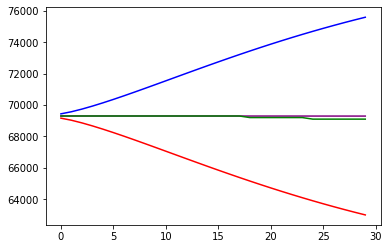

In [ ]:
# 학습 데이터셋으로부터 30일 뒤를 예측합니다.
forecast_data = model_fit.forecast(steps=30) 

pred_y = forecast_data[0].tolist() # 마지막 30일의 예측 데이터
test_y = test_df.subscriberCount.values # 실제 30일 가격 데이터
pred_y_lower = [] # 마지막 30일의 예측 데이터의 최소값
pred_y_upper = [] # 마지막 30일의 예측 데이터의 최대값
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

#plt.ylim([78000,88000])
plt.plot(pred_y, color="purple") # 모델이 예상한 그래프
plt.plot(pred_y_lower, color="red") # 모델이 예상한 최소 그래프
plt.plot(pred_y_upper, color="blue") # 모델이 예상한 최대 그래프
plt.plot(test_y, color="green") # 실제 가격 그래프

In [ ]:
from sklearn import metrics

print(metrics.mean_absolute_error(test_y, pred_y))

58.93519368792379


In [ ]:
forecast_data[0]

array([69299.9389764 , 69299.94135973, 69299.92033117, 69299.87729699,
       69299.81361373, 69299.73058917, 69299.6294832 , 69299.51150878,
       69299.37783282, 69299.22957722, 69299.06781977, 69298.89359517,
       69298.707896  , 69298.5116737 , 69298.30583957, 69298.09126578,
       69297.86878634, 69297.63919809, 69297.40326175, 69297.1617028 ,
       69296.91521257, 69296.66444916, 69296.41003838, 69296.15257478,
       69295.89262256, 69295.63071648, 69295.36736284, 69295.10304037,
       69294.83820114, 69294.57327144])

## 발표날까지 예측

In [ ]:
# (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습
model = ARIMA(df.subscriberCount.values, order=(2,0,2))

#trend : constant를 가지고 있는지, c - constant / nc - no constant
#disp : 수렴 정보를 나타냄
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  368
Model:                     ARMA(2, 2)   Log Likelihood               -2079.321
Method:                       css-mle   S.D. of innovations             67.829
Date:                Sun, 21 Feb 2021   AIC                           4170.641
Time:                        07:03:42   BIC                           4194.090
Sample:                             0   HQIC                          4179.957
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.927e+04   4398.692     15.747      0.000    6.06e+04    7.79e+04
ar.L1.y        1.9387      0.026     74.996      0.000       1.888       1.989
ar.L2.y       -0.9402      0.027    -34.467      0.0

In [ ]:
# 2021/02/16 데이터셋으로부터 발표날까지 step일 이후까지 예측
step = 9
forecast_data = model_fit.forecast(steps=step) 

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df.index[-1], periods=2)[1])[:10]

In [ ]:
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

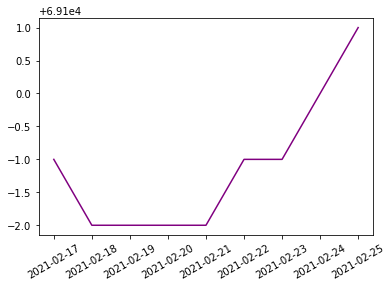

In [ ]:
pred_y = forecast_data[0].astype(int).tolist() #예측 데이터

plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.xticks(rotation=30)
plt.plot(pred_y, color="purple") # 모델이 예상한 구독자 수 그래프

In [ ]:
# 실제 예측 데이터 값
forecast_data[0].astype(int)

array([69099, 69098, 69098, 69098, 69098, 69099, 69099, 69100, 69101])

In [ ]:
# 기존(과거) 데이터와 예측(미래) 데이터를 한 배열로 합침
arr = np.append(df['subscriberCount'].to_numpy(), pred_y)

In [ ]:
# 날짜 데이터 배열 생성
date_arr = []
for i in range(len(arr)):
  # 날짜가 너무 많으면 보기 힘드므로 10일에 한번씩만 기록하고 나머지는 공백
  if i % 10 == 0:
    date_arr.append(str(pd.date_range(df.index[0], periods=len(arr))[i])[:10])
  else:
    date_arr.append("")

# 마지막 날짜로부터 예측일 범주까지는 비움(마지막날이랑 가까우면 그래프에서 겹쳐서 안보임)
for i in range(1,step):
  date_arr[len(date_arr)-i] = ""

# 전체 날짜 데이터 마지막 날을 예측 데이터 마지막 날로 대체
date_arr[len(date_arr)-1] = forecast_date[-1]

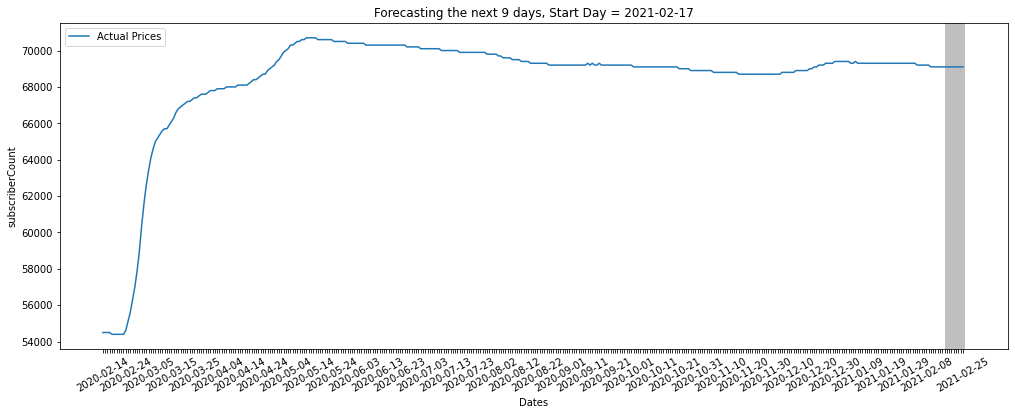

In [ ]:
plt.figure(figsize=(17,6))
# 기존(과거) 데이터
plt.plot(arr, label="Actual Prices")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {len(pred_y)} days, Start Day = {forecast_date[0]}")
# 미래 예측 구간 강조
plt.axvspan(len(df), len(arr), facecolor='gray', alpha=0.5)
# x 축 값 이름 변경 / 회전
plt.xticks(list(range(len(arr))), date_arr, rotation = 30)
plt.legend()
plt.show()

In [ ]:
import datetime
from pytz import timezone, utc

KST = timezone('Asia/Seoul')
now = datetime.datetime.utcnow()
print(utc.localize(now).astimezone(KST))

2021-02-21 16:03:44.334980+09:00
